# A1: Three-Layer Neural Network

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1">Requirements</a></span></li><li><span><a href="#Example-Results" data-toc-modified-id="Example-Results-2">Example Results</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3">Discussion</a></span></li></ul></div>

## Requirements

In this assignment, you will start with code from lecture notes 04 and add code to do the following.

* Add another hidden layer, for a total of two hidden layers.  This layer will use a weight matrix named `U`.  Its outputs will be named `Zu` and the outputs of the second hidden layer will be changed to `Zv`.
* Define function `forward` that returns the output of all of the layers in the neural network for all samples in `X`. `X` is assumed to be standardized and have the initial column of constant 1 values.

      def forward(X, U, V, W):
          .
          .
          .
          Y = . . . # output of neural network for all rows in X
          return Zu, Zv, Y
      
* Define function `gradient` that returns the gradients of the mean squared error with respect to each of the three weight matrices. `X` and `T` are assumed to be standardized and `X` has the initial column of 1's.

      def gradient(X, T, Zu, Zv, Y, U, V, W):
          .
          .
          .
          return grad_wrt_U, grad_wrt_V, grad_wrt_W
          
* Define function `train` that returns the resulting values of `U`, `V`, and `W` and the standardization parameters.  Arguments are unstandardized `X` and `T`, the number of units in the two hidden layers, the number of epochs and the learning rate, which is the same value for all layers. This function standardizes `X` and `T`, initializes `U`, `V` and `W` to uniformly distributed random values between -1 and 1, and `U`, `V` and `W` for `n_epochs` times as shown in lecture notes 04.  This function must call `forward`, `gradient` and `addOnes`.

      def train(X, T, n_units_U, n_units_V, n_epochs, rho):
          .
          .
          .
          return U, V, W, X_means, X_stds, T_means, T_stds
          
* Define function `use` that accepts unstandardized `X`, standardization parameters, and weight matrices `U`, `V`, and `W` and returns the unstandardized output.

      def use(X, X_means, X_stds, T_means, T_stds, U, V, W):
          .
          .
          .
          Y = ....
          return Y

## Example Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def addOnes(X):
    return np.insert(X, 0, 1, axis=1)

Add code cells here to define the functions above.  Once these are correctly defined, the following cells should run and produce similar results as those here.

In [2]:
def rmse(T, Y, Tstds):
        error = (T - Y) * Tstds 
        return np.sqrt(np.mean(error ** 2))


In [3]:
def forward(X, U, V, W):
    Zu= np.tanh(X @ U)
    Zv=np.tanh(addOnes(Zu) @ V)
    Z1 = addOnes(Zv)
    Y= Z1 @ W
    return Zu, Zv, Y

In [4]:
def gradient(X, T, Zu, Zv, Y, U, V, W):
 
    Dw = T - Y
    grad_wrt_W=-addOnes(Zv).T@Dw
    Dv=Dw@W[1:,:].T*(1-Zv**2)
    grad_wrt_V=-addOnes(Zu).T@Dv
    Du=Dv@V[1:,:].T*(1-Zu**2)
    grad_wrt_U=-addOnes(X).T@Du
  
# 	grad_wrt_W=-addOnes(Zv).T@(T-Y)
# 	grad_wrt_V=-addOnes(Zu).T@(((T-Y)@W[1:, :].T)*(1-Zv**2))
# 	grad_wrt_U=-addOnes(X).T@(((T-Y)@W[1:, :].T)*(1-Zv**2)@V[1:, :].T*(1-Zu**2))
 
    
    return grad_wrt_U, grad_wrt_V, grad_wrt_W

In [5]:
def use(X, X_means, X_stds, T_means, T_stds, U, V, W):
    X=(X-X_means)/X_stds
    Zu, Zv, Y=forward(addOnes(X), U, V, W)
    Y=Y*T_stds+T_means
    return Y 

In [6]:
def train(X, T, n_units_U, n_units_V, n_epochs, rho):
    Xmeans = X.mean(axis=0)
    Xstds = X.std(axis=0)
    Tmeans = T.mean(axis=0)
    Tstds = T.std(axis=0)
    XtrainS = (X - Xmeans) / Xstds
    TtrainS = (T - Tmeans) / Tstds
    XtrainS1 = addOnes(XtrainS)

    U = np.random.uniform(-1, 1, size=(XtrainS1.shape[1], n_units_U))  
    V = np.random.uniform(-1, 1, size=(n_units_U + 1, n_units_V))  
    W = np.random.uniform(-1, 1, size=(n_units_V+1, TtrainS.shape[1]))  

    rhoI = rho/(T.shape[0]*T.shape[1])

    error=[]

    for epoch in range(n_epochs):
        Zu, Zv, Y=forward(XtrainS1, U, V, W)

        grad_wrt_U, grad_wrt_V, grad_wrt_W=gradient(XtrainS, TtrainS, Zu, Zv, Y, U, V, W)

        # Take step down the gradient
        U = U - rhoI * grad_wrt_U
        V = V - rhoI * grad_wrt_V  
        W = W - rhoI * grad_wrt_W  		

        error.append(rmse(TtrainS, Y, Tstds))
#         if epoch==95:
#             aaa=111
 

#         if epoch%50==0:
#             print(epoch)
 
    return U, V, W, Xmeans, Xstds, Tmeans, Tstds

In [7]:
Xtrain = np.arange(4).reshape(-1, 1)
Ttrain = Xtrain ** 2

Xtest = Xtrain + 0.5
Ttest = Xtest ** 2

In [8]:
U = np.array([[1, 2, 3], [4, 5, 6]])  # 2 x 3 matrix, for 2 inputs (include constant 1) and 3 units
V = np.array([[-1, 3], [1, 3], [-2, 1], [2, -4]]) # 2 x 3 matrix, for 3 inputs (include constant 1) and 2 units
W = np.array([[-1], [2], [3]])  # 3 x 1 matrix, for 3 inputs (include constant 1) and 1 ounit

In [9]:
X_means = np.mean(Xtrain, axis=0)
X_stds = np.std(Xtrain, axis=0)
Xtrain_st = (Xtrain - X_means) / X_stds

In [10]:
Zu, Zv, Y = forward(addOnes(Xtrain_st), U, V, W)
print('Zu = ', Zu)
print('Zv = ', Zv)
print('Y = ', Y)

Zu =  [[-0.99967774 -0.99983726 -0.99991782]
 [-0.65775956 -0.23177837  0.3065367 ]
 [ 0.99246605  0.99958165  0.99997685]
 [ 0.9999941   0.99999995  1.        ]]
Zv =  [[-9.64016194e-01  9.95062648e-01]
 [-5.23485834e-01 -4.06326878e-01]
 [-6.74345774e-03  9.94823310e-01]
 [-5.79521329e-06  9.95054578e-01]]
Y =  [[ 0.05715556]
 [-3.2659523 ]
 [ 1.97098301]
 [ 1.98515214]]


In [11]:
T_means = np.mean(Ttrain, axis=0)
T_stds = np.std(Ttrain, axis=0)
Ttrain_st = (Ttrain - T_means) / T_stds
grad_wrt_U, grad_wrt_V, grad_wrt_W = gradient(Xtrain_st, Ttrain_st, Zu, Zv, Y, U, V, W)
print('grad_wrt_U = ', grad_wrt_U)
print('grad_wrt_V = ', grad_wrt_V)
print('grad_wrt_W = ', grad_wrt_W)

grad_wrt_U =  [[-12.92244218   0.95763799  16.44936549]
 [  5.83033911  -0.43361979  -7.35611199]]
grad_wrt_V =  [[ 0.92812794 -6.29102685]
 [ 6.74349351  4.24106248]
 [ 5.19130234  1.51895191]
 [ 3.19836999 -1.92147926]]
grad_wrt_W =  [[0.74733841]
 [0.30431595]
 [4.31908649]]


In [12]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
Y

array([[ 3.70004445],
       [-7.93083306],
       [10.39844055],
       [10.44803251]])

Here is another example that just shows the final results of training.

In [13]:
n = 30
Xtrain = np.linspace(0., 20.0, n).reshape((n, 1)) - 10
Ttrain = 0.2 + 0.05 * (Xtrain + 10) + 0.4 * np.sin(Xtrain + 10) + 0.2 * np.random.normal(size=(n, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * (Xtest + 10) + 0.4 * np.sin(Xtest + 10) + 0.2 * np.random.normal(size=(n, 1))

In [14]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 100, 0.01)

0
50


In [15]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

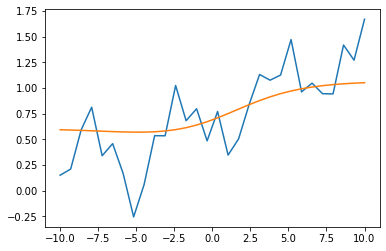

In [16]:
plt.plot(Xtrain, Ttrain)
plt.plot(Xtrain, Y);

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
10000
10050
10100
10150

70850
70900
70950
71000
71050
71100
71150
71200
71250
71300
71350
71400
71450
71500
71550
71600
71650
71700
71750
71800
71850
71900
71950
72000
72050
72100
72150
72200
72250
72300
72350
72400
72450
72500
72550
72600
72650
72700
72750
72800
72850
72900
72950
73000
73050
73100
73150
73200
73250
73300
73350
73400
73450
73500
73550
73600
73650
73700
73750
73800
73850
73900
73950
74000
74050
74100
74150
74200
74250
74300
74350
74400
74450
74500
74550
74600
74650
74700
74750
74800
74850
74900
74950
75000
75050
75100
75150
75200
75250
75300
75350
75400
75450
75500
75550
75600
75650
75700
75750
75800
75850
75900
75950
76000
76050
76100
76150
76200
76250
76300
76350
76400
76450
76500
76550
76600
76650
76700
76750
76800
76850
76900
76950
77000
77050
77100
77150
77200
77250
77300
77350
77400
77450
77500
77550
77600
77650
77700
77750
77800
77850
77900
77950
78000
78050
78100
78150
78200
78250
78300
78350
78400
78450
78500
78550
78600
78650
78700
78750
78800
78850
78900
78950
79000
79050
79100
7915

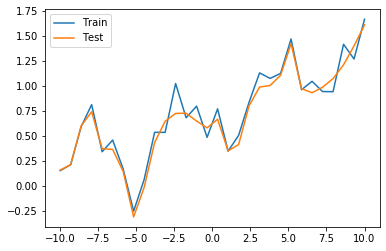

In [17]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 100000, 0.1)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.legend();
plt.show()

## Discussion

In this markdown cell, describe what difficulties you encountered in completing this assignment. What parts were easy for you and what parts were hard?

# Grading

**A1grader.tar is now available.**

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.tar) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  The remaining 10 points will be based on your discussion of this assignment.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [19]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Chen-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
    X = np.arange(4).reshape(-1, 1)
    T = np.log(X + 10)

    ni = 1
    nu = 2
    nv = 3
    U = np.arange((ni + 1) * nu).reshape(ni + 1, nu) * 0.1
    V = (np.arange((nu + 1) * nv).reshape(nu + 1, nv) - 6) * 0.1
    W = np.arange(nv + 1).reshape(nv + 1, 1) * -0.1

    Zu, Zv, Y = forward(addOnes(X), U, V, W)


--- 20/20 points. Zu, Zv and Y are correct.

Testing
    X = np.arange(4).reshape(-1, 1)
    T = np.log(X + 10)

    ni = 1
    nu = 2
    nv = 3
    U = np.arange((ni + 1) * nu).reshape(ni + 1, nu) * 0.1
    V = (np.arange((nu + 1) * nv).reshape(nu + 1, nv) - 6) * 0.1
    W = np.arange(nv + 1).reshape(nv + 1, 1) * -0.1

    Zu = np.array([[0.        , 0.09966799],
                   [0.19737532, 0.37994896],
                   [0.37

4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
440

# Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/131494).

# Extra Credit

Apply your multilayer neural network code to a regression problem using data that you choose 
from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). Pick a dataset that
is listed as being appropriate for regression.